In [1]:
import numpy as np
import matplotlib.pyplot as plt
import models
import corner
from scipy import optimize
from Pymod import prep
from plotter import semlog
%matplotlib inline
%load_ext autoreload

In [2]:
WT_08_lbl, WT_08_rtot, WT_08_lig, WT_08_sat = prep.datprep('Data/EGFR_WT_08_Sat.csv','Data/EGFR_WT_08_Rtot.csv')

hootie hoo! the indices match!


In [3]:
WT_09_lbl, WT_09_rtot, WT_09_lig, WT_09_sat = prep.datprep('Data/EGFR_WT_09_Sat.csv','Data/EGFR_WT_09_Rtot.csv')

hootie hoo! the indices match!


In [4]:
WT_11_lbl, WT_11_rtot, WT_11_lig, WT_11_sat = prep.datprep('Data/EGFR_WT_11_Sat.csv','Data/EGFR_WT_11_Rtot.csv')

hootie hoo! the indices match!


In [5]:
all_rtots = np.concatenate([WT_08_rtot,WT_09_rtot,WT_11_rtot])

In [6]:
all_ligs = np.concatenate([WT_08_lig,WT_09_lig,WT_11_lig])

In [7]:
all_sats = np.concatenate([WT_08_sat,WT_09_sat,WT_11_sat])

In [8]:
all_labs = np.concatenate([WT_08_lbl,WT_09_lbl,WT_11_lbl])

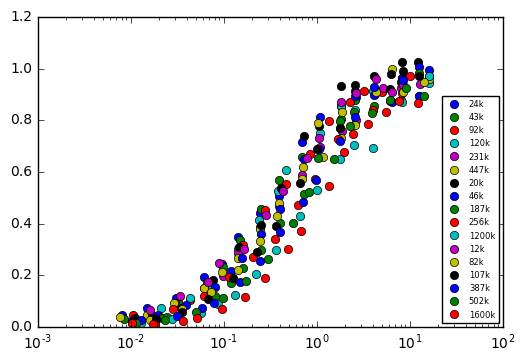

In [9]:
semlog(all_ligs,all_sats,all_labs)

In [10]:
predicted = np.array([
5.70E-04,
1.02E-03,
2.18E-03,
2.85E-03,
5.48E-03,
1.06E-02,
4.75E-04,
1.09E-03,
4.44E-03,
6.07E-03,
2.85E-02,
2.85E-04,
1.95E-03,
2.54E-03,
9.18E-03,
1.19E-02,
3.80E-02])

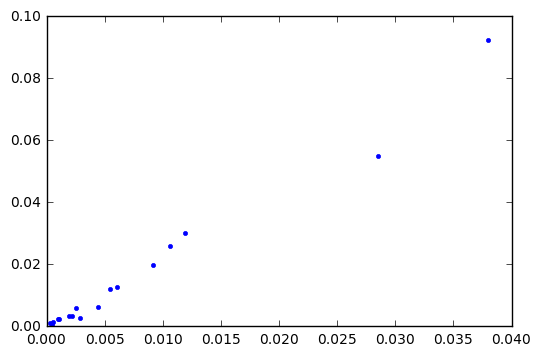

In [11]:
plt.plot(predicted,all_rtots,'.')

In [12]:
guess = np.array([4.6,5.3,0.34,530.])

In [13]:
bounds1 = ((0.,0.,0.,0.),(10.,10.,10.,10000.))

In [14]:
res2 = optimize.least_squares(models.wyman_sp,guess,bounds=bounds1,args=(all_ligs,all_sats,all_rtots))

In [15]:
res2.x

array([  3.74744078e+00,   1.81369998e+00,   1.15548972e-01,
         2.83401420e+02])

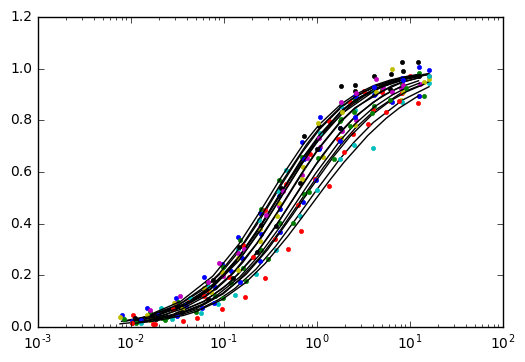

In [16]:
for i in range(len(all_ligs)):
    plt.semilogx(all_ligs[i], models.wyman_bestfit(res2.x,all_ligs[i],all_rtots[i]),'-',color="black")
    plt.semilogx(all_ligs[i], all_sats[i],'.')

In [17]:
errs = all_sats*0.05

In [18]:
res3 = optimize.least_squares(models.wyman_sp,guess,bounds=bounds1,args=(all_ligs,all_sats,all_rtots,errs))

In [19]:
res3.x

array([  3.69121730e+00,   7.11229840e-01,   1.63837540e-02,
         2.11579143e+02])

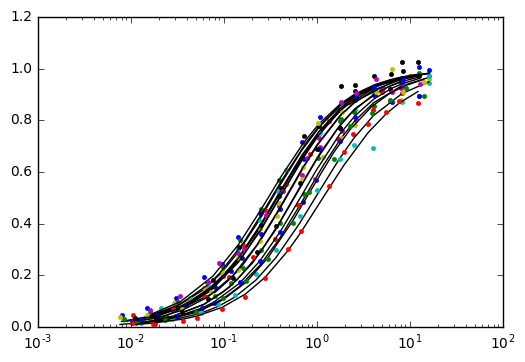

In [20]:
for i in range(len(all_ligs)):
    plt.semilogx(all_ligs[i], models.wyman_bestfit(res3.x,all_ligs[i],all_rtots[i]),'-',color="black")
    plt.semilogx(all_ligs[i], all_sats[i],'.')

In [21]:
res4 = optimize.least_squares(models.wyman_sp,guess,bounds=bounds1,args=(all_ligs,all_sats,all_rtots,),loss='soft_l1')

In [22]:
res4.x

array([  3.74779499e+00,   1.81246460e+00,   1.15650823e-01,
         2.83586103e+02])

In [23]:
res2.x

array([  3.74744078e+00,   1.81369998e+00,   1.15548972e-01,
         2.83401420e+02])

In [24]:
res5 = optimize.least_squares(models.wyman_sp,guess,bounds=bounds1,args=(all_ligs,all_sats,all_rtots,errs),loss='soft_l1')

In [25]:
res5.x

array([  3.45125710e+00,   8.52744944e-01,   4.41956206e-02,
         1.95978738e+02])

In [26]:
a = np.stack([res2.x,res3.x,res4.x,res5.x],axis=0)

In [27]:
res2.fun

array([ -2.44707093e-02,  -3.31365678e-02,  -3.22163135e-02,
        -4.65018168e-02,  -3.12542433e-02,  -5.64598547e-02,
        -2.84207797e-02,   2.91427883e-02,  -4.27147731e-02,
        -4.72828390e-02,  -3.19005846e-03,   1.52835135e-04,
         2.93528859e-02,   1.63021238e-02,  -1.55282189e-02,
        -9.86806399e-03,  -2.00711153e-02,  -2.09972305e-02,
        -2.98842876e-02,  -3.11214250e-02,  -5.92719685e-02,
        -5.89189492e-02,  -5.57481770e-02,  -7.45393574e-03,
         3.04383192e-02,   1.45771442e-03,   1.78690131e-02,
        -4.37334405e-03,  -2.00809232e-02,  -9.81241237e-03,
        -7.00505252e-03,  -3.89357792e-02,  -5.00136942e-02,
        -1.81381767e-02,   8.67011290e-03,  -2.27009044e-02,
        -1.37097152e-02,  -2.01988646e-02,   2.03263067e-02,
        -9.67925922e-03,   6.21063758e-03,  -2.37307672e-02,
        -1.35798961e-02,  -1.49664009e-02,  -3.87485296e-02,
        -3.83421067e-02,  -2.87921243e-02,  -6.13893199e-02,
        -7.37489832e-03,

In [29]:
for i in all_ligs:
    print(i.size)

15
13
13
13
12
15
14
15
15
14
14
15
13
14
15
14
15


In [41]:
resl = res5.fun

In [46]:
expected = models.wyman_bestfit(res3.x,all_ligs[0],all_rtots[0])
resl3 = res3.fun[0:15]

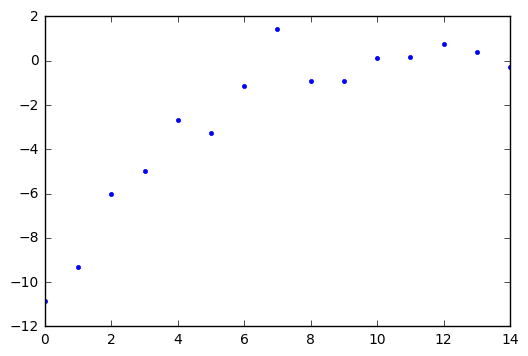

In [48]:
plt.plot(resl3,'.')

In [49]:
newsl = resl3/expected

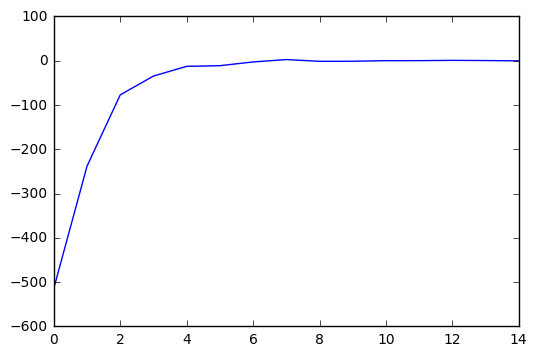

In [50]:
plt.plot(newsl)

In [51]:
res2.cost

0.15561055883542796

In [52]:
res2.fun

array([ -2.44707093e-02,  -3.31365678e-02,  -3.22163135e-02,
        -4.65018168e-02,  -3.12542433e-02,  -5.64598547e-02,
        -2.84207797e-02,   2.91427883e-02,  -4.27147731e-02,
        -4.72828390e-02,  -3.19005846e-03,   1.52835135e-04,
         2.93528859e-02,   1.63021238e-02,  -1.55282189e-02,
        -9.86806399e-03,  -2.00711153e-02,  -2.09972305e-02,
        -2.98842876e-02,  -3.11214250e-02,  -5.92719685e-02,
        -5.89189492e-02,  -5.57481770e-02,  -7.45393574e-03,
         3.04383192e-02,   1.45771442e-03,   1.78690131e-02,
        -4.37334405e-03,  -2.00809232e-02,  -9.81241237e-03,
        -7.00505252e-03,  -3.89357792e-02,  -5.00136942e-02,
        -1.81381767e-02,   8.67011290e-03,  -2.27009044e-02,
        -1.37097152e-02,  -2.01988646e-02,   2.03263067e-02,
        -9.67925922e-03,   6.21063758e-03,  -2.37307672e-02,
        -1.35798961e-02,  -1.49664009e-02,  -3.87485296e-02,
        -3.83421067e-02,  -2.87921243e-02,  -6.13893199e-02,
        -7.37489832e-03,

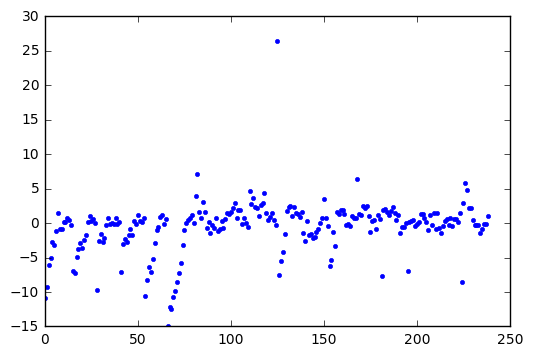

In [53]:
plt.plot(res3.fun,'.')

In [54]:
errs

array([ array([ 0.00230193,  0.00365096,  0.00557816,  0.00962527,  0.01213062,
        0.01733405,  0.02205568,  0.02533191,  0.03573876,  0.04065311,
        0.04267666,  0.0445075 ,  0.0449893 ,  0.04730193,  0.04980728]),
       array([ 0.00153105,  0.00297645,  0.00480728,  0.00866167,  0.01155246,
        0.01685225,  0.02282655,  0.02841542,  0.03294432,  0.04026767,
        0.04383297,  0.04585653,  0.04816917]),
       array([ 0.00220557,  0.00519272,  0.00721628,  0.01579229,  0.02253748,
        0.02764454,  0.03342613,  0.03978587,  0.04344754,  0.04566382,
        0.0454711 ,  0.04865096,  0.04855461]),
       array([ 0.00365096,  0.00557816,  0.00789079,  0.01511777,  0.02070664,
        0.02639187,  0.03043897,  0.03747324,  0.04277302,  0.04190578,
        0.04556746,  0.04788009,  0.04720557]),
       array([ 0.00471092,  0.00750536,  0.00981799,  0.0143469 ,  0.0193576 ,
        0.02330835,  0.02937902,  0.03477516,  0.03785867,  0.03997859,
        0.04614561,  0.046

((0.0, 0.0, 0.0, 0.0), (10.0, 10.0, 10.0, 10000.0))

In [57]:
res_wt1 = optimize.least_squares(models.wyman_sp,guess,bounds=bounds1,args=(WT_08_lig,WT_08_sat,WT_08_rtot))

In [58]:
res_wt1.x

array([   3.79528235,    5.44194489,    0.19624525,  170.09725774])

In [59]:
res2.x

array([  3.74744078e+00,   1.81369998e+00,   1.15548972e-01,
         2.83401420e+02])

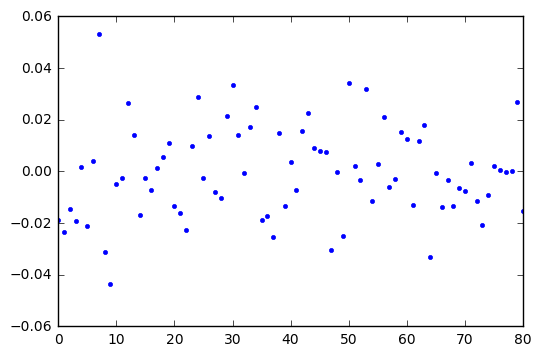

In [61]:
plt.plot(res_wt1.fun,'.')

In [62]:
WT_08_err = 0.05*WT_08_sat

In [63]:
res_wt1h = optimize.least_squares(models.wyman_sp,guess,bounds=bounds1,args=(WT_08_lig,WT_08_sat,WT_08_rtot,WT_08_err))

In [64]:
res_wt1h.x

array([  6.24977378e+00,   6.00343234e+00,   4.96988963e-01,
         3.48860743e+03])

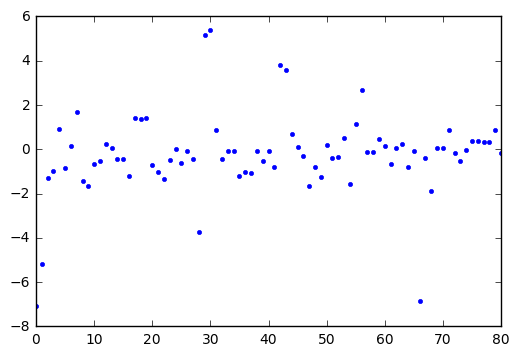

In [65]:
plt.plot(res_wt1h.fun,'.')

In [66]:
from scipy import stats

In [67]:
stats.normaltest(res_wt1.fun)

NormaltestResult(statistic=1.6828038729929593, pvalue=0.43110571673971432)

In [68]:
stats.normaltest(res_wt1h.fun)

NormaltestResult(statistic=21.791069692999375, pvalue=1.8540837124498822e-05)

In [69]:
stats.shapiro(res_wt1.fun)

(0.9917553067207336, 0.8898860216140747)

In [70]:
stats.shapiro(res_wt1h.fun)

(0.8277326822280884, 2.6864293900530356e-08)

In [72]:
np.mean(res_wt1.fun)

-0.00053258661972699285

In [73]:
np.mean(res_wt1h.fun)

-0.22333777560642967

In [77]:
colors = ['b','g','r','c','m','y','k']

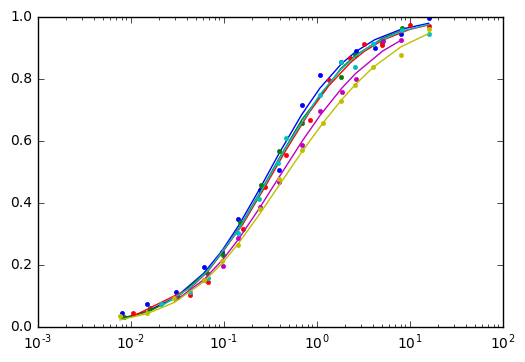

In [78]:
for i in range(len(WT_08_lig)):
    plt.semilogx(WT_08_lig[i], models.wyman_bestfit(res_wt1.x,WT_08_lig[i],WT_08_rtot[i]),'-',color=colors[i])
    plt.semilogx(WT_08_lig[i], WT_08_sat[i],'.',color=colors[i])

In [79]:
WT_08_lig

array([ array([  7.96945700e-03,   1.49932600e-02,   3.09951900e-02,
         6.10952800e-02,   9.51486100e-02,   1.43964800e-01,
         2.43969000e-01,   3.94505100e-01,   6.86923000e-01,
         1.07939900e+00,   1.84758300e+00,   2.61864500e+00,
         4.19711500e+00,   8.12129800e+00,   1.60132400e+01]),
       array([ 0.00843508,  0.01632461,  0.03219274,  0.06589953,  0.09789267,
        0.1495181 ,  0.2533132 ,  0.3979881 ,  0.6938425 ,  1.831155  ,
        2.570049  ,  5.068029  ,  8.196809  ]),
       array([  1.04782800e-02,   4.39510000e-02,   6.71754600e-02,
         1.59764000e-01,   2.75784200e-01,   4.67317900e-01,
         8.37884700e-01,   1.34129100e+00,   2.29507100e+00,
         3.22207200e+00,   5.06843800e+00,   9.99232400e+00,
         1.63226300e+01]),
       array([  0.02105896,   0.04394744,   0.06716596,   0.142679  ,
         0.237226  ,   0.3870431 ,   0.4670442 ,   1.080119  ,
         1.830193  ,   2.595465  ,   4.079464  ,   8.197306  ,  16.17389   

In [80]:
WT_08_sat

array([ array([ 0.04603855,  0.07301927,  0.1115632 ,  0.1925054 ,  0.2426124 ,
        0.3466809 ,  0.4411135 ,  0.5066381 ,  0.7147752 ,  0.8130621 ,
        0.8535332 ,  0.8901499 ,  0.8997859 ,  0.9460385 ,  0.9961456 ]),
       array([ 0.03062099,  0.05952891,  0.09614561,  0.1732334 ,  0.2310493 ,
        0.337045  ,  0.4565311 ,  0.5683084 ,  0.6588865 ,  0.8053533 ,
        0.8766595 ,  0.9171307 ,  0.9633833 ]),
       array([ 0.04411135,  0.1038544 ,  0.1443255 ,  0.3158458 ,  0.4507495 ,
        0.5528908 ,  0.6685225 ,  0.7957174 ,  0.8689507 ,  0.9132763 ,
        0.9094219 ,  0.9730192 ,  0.9710921 ]),
       array([ 0.07301927,  0.1115632 ,  0.1578158 ,  0.3023555 ,  0.4141328 ,
        0.5278373 ,  0.6087794 ,  0.7494647 ,  0.8554604 ,  0.8381156 ,
        0.9113491 ,  0.9576017 ,  0.9441114 ]),
       array([ 0.09421842,  0.1501071 ,  0.1963597 ,  0.2869379 ,  0.3871521 ,
        0.466167  ,  0.5875803 ,  0.6955032 ,  0.7571734 ,  0.7995718 ,
        0.9229122 ,  0.924

In [89]:
temp = np.concatenate(WT_08_sat)

In [92]:
type(temp)

numpy.ndarray

In [95]:
np.savetxt('derp',temp)

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')